In [1]:
# Data Wrangling Libraries
import pandas as pd
import numpy as np

### About the data

In [2]:
# Read a comma-separated values (csv) file into DataFrame
df_data = pd.read_csv(r"C:/Users/Inca/Documents/Australia/Deakin/2023/T3 2023/datasets/PressureUlcers_AdditionalData_1.csv")

# Detect missing values. Returns bool values for each element in the dataframe
# 0 means no null values.
df_data.isnull().sum()

# Data type and null value checking
df_data.info()

# Load a copy of the original dataset
data_norm = df_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8707 entries, 0 to 8706
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cod_pat  8707 non-null   int64  
 1   Time     8707 non-null   object 
 2   Ax       8707 non-null   float64
 3   Ay       8707 non-null   float64
 4   Az       8707 non-null   float64
 5   Mx       8707 non-null   float64
 6   My       8707 non-null   float64
 7   Mz       8707 non-null   float64
 8   Ch       8707 non-null   float64
 9   Label    8707 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 680.4+ KB


### Data display

- Cod_pat is the unique code for each person;
- Time is the timestamp;
- Ax, Ay, Az represent the axis of the acceleration;
- Mx, My, Mz represent the axis of the magnetometer;
- Ch is the compass heading;
- Label is the Class that provide the activity of the person.<br>It is recording the body position while performing five physical activities such as:<br>staying seated, prone, supine, laying on the right and left, and in motion.<br>It is represented like 0, 1, 2, 3, 4, 5.

In [3]:
df_data

,Cod_pat,Time,Ax,Ay,Az,Mx,My,Mz,Ch,Label
0,55555,13/5/2018 12:39,-1.714,0.047,9.730,-2.94,25.14,-28.80,2.06,0
1,55555,13/5/2018 12:39,-1.810,0.105,9.778,-3.12,25.44,-29.10,1.44,0
2,55555,13/5/2018 12:39,-1.790,0.076,9.768,-3.18,25.62,-29.52,1.93,0
3,55555,13/5/2018 12:39,-1.723,0.057,9.749,-3.42,25.80,-29.58,1.80,0
4,55555,13/5/2018 12:39,-1.762,0.057,9.739,-3.48,25.74,-29.76,1.67,0
...,...,...,...,...,...,...,...,...,...,...
8702,55555,18/5/2018 12:44,-6.200,-6.750,2.710,37.91,27.36,3.88,34.50,5
8703,55555,18/5/2018 12:44,-5.920,-8.040,2.080,38.91,24.82,1.63,35.82,5
8704,55555,18/5/2018 12:44,-4.470,-7.490,1.770,39.64,22.73,0.10,32.53,5
8705,55555,18/5/2018 12:44,-6.710,-7.880,4.980,32.55,32.00,4.39,29.83,5


### SVM and Classification Report

<b>Accuracy</b><br>
The overall accuracy of the SVM model on the test set is approximately 98.34%.

<b>Confusion Matrix</b><br>
The confusion matrix provides a detailed breakdown of correct and incorrect<br> predictions for each class.
Most of the diagonal elements have high values,<br> indicating correct predictions.
Off-diagonal elements are mostly zeros, suggesting<br> few misclassifications.

<b>Classification Report</b><br>
<b>Precision:</b> The model's ability to correctly classify instances of each class is high,<br> as indicated by high precision values.<br>
<b>Recall:</b> The recall (sensitivity) values are also high, indicating that the model<br> captures most instances of each class.<br>
<b>F1-score:</b> The harmonic mean of precision and recall is high, indicating a good<br> balance between precision and recall.<br>
<b>Support:</b> The number of actual occurrences of each class in the test set.

<b>Individual Class Performance</b><br>
Class 0, 1, 2, and 3: Perfect precision, recall, and F1-score.<br>
Class 4: Slightly lower precision, indicating a few false positives.<br>
Class 5: Lower recall and F1-score, suggesting that the model struggles more<br> with this class.<br>

<b>Macro and Weighted Averages:</b><br>
Macro avg: The average precision, recall, and F1-score across all classes.<br> It is high, indicating good overall performance.<br>
Weighted avg: The weighted average based on the number of true instances for each class. If it is high, it means that it is a well-performing model.

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Load and Preprocess Data.
# Split the data into features (X) and labels (y).
X = data_norm.drop(['Cod_pat', 'Time', 'Label', 'Ch'], axis=1)
y = data_norm['Label']

# Step 2: Split the data into training and testing sets (80% training and 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the SVM model.
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set.
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 6: Print the results.
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9833524684270953
Confusion Matrix:
 [[456   0   0   0   0   0]
 [  0 263   0   0   0   0]
 [  0   0 260   0   0   0]
 [  0   0   0 197   0   1]
 [  0   0   0   0 460   0]
 [  4   0   0   0  24  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       260
           3       1.00      0.99      1.00       198
           4       0.95      1.00      0.97       460
           5       0.99      0.73      0.84       105

    accuracy                           0.98      1742
   macro avg       0.99      0.95      0.97      1742
weighted avg       0.98      0.98      0.98      1742



### GridSearchCV to tune hyperparameters

This code essentially performs hyperparameter tuning for an SVM model<br>using a grid search approach and evaluates the final model on a test dataset.

<b>Standard scaling</b> is applied to the features using StandardScaler to ensure<br>that all features have the same scale.

<b>param_grid</b> is a dictionary containing lists of hyperparameter values to search over.<br>In this case, it includes different values for the regularization parameter C<br>and the kernel coefficient gamma.

<b>GridSearchCV</b> is used to perform a grid search with cross-validation<br> (6-fold cross-validation in this case) to find the best combination of hyperparameters<br> for the Support Vector Machine (SVM) model with a radial basis function (RBF) kernel.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Preprocess Data.
# Split the data into features (X) and labels (y).
X = data_norm.drop(['Cod_pat', 'Time', 'Label', 'Ch'], axis=1)
y = data_norm['Label']

# Step 2: Split the data into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define a list of hyperparameters to search over.
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Step 5: Perform GridSearchCV to tune hyperparameters.
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=6)
grid_search.fit(X_train, y_train.values.ravel())

# Step 6: Get the best hyperparameters.
best_params = grid_search.best_params_
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
print(f"Best C:{best_C}")
print(f"Best Gamma:{best_gamma}")

# Step 7: Train the final model with the best hyperparameters.
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(X_train, y_train.values.ravel())

# Step 8: Evaluate model performance on test dataset.
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 9: Print the results. 
print("Test Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Best C:1
Best Gamma:1
Test Accuracy: 0.9988518943742825
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00       275
           2       1.00      1.00      1.00       276
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       437
           5       0.99      0.99      0.99       114

    accuracy                           1.00      1742
   macro avg       1.00      1.00      1.00      1742
weighted avg       1.00      1.00      1.00      1742



### KNN model

The KNN model achieved a perfect accuracy of 1.0000 on the test<br> set when using the best k value, which is 1.
An accuracy of 1.0000<br> indicates that all instances in the test set were correctly classified<br> by the model.
The choice of k is a crucial hyperparameter in KNN,<br> and in this case, the model performed best with the nearest neighbor<br> approach (k=1).
It is important to note that achieving perfect accuracy<br> may raise questions about overfitting, and further evaluation and validation<br> on unseen data could provide a more comprehensive understanding of the<br> model's generalization performance.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Step 1: Load and Preprocess Data.
# Split the data into features (X) and labels (y).
X = data_norm.drop(['Cod_pat', 'Time', 'Label', 'Ch'], axis=1)
y = data_norm['Label']

# Step 2: Split the data into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the number of neighbors (k)
k_values = range(1, 10)
best_k = None
best_score = 0

# Iterate over different k values to find the best one
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=6)  # 6-fold cross-validation
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
        
# Train the KNN model with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train.values.ravel())

# Evaluate the KNN model on the test set
knn_accuracy = knn.score(X_test, y_test)
print(f"KNN Accuracy (k={best_k}): {knn_accuracy:.4f}")

KNN Accuracy (k=1): 1.0000


### TensorFlow neural network

The overall architecture of the neural network includes an input layer with the specified number<br>
of features, and the model is initialized with this input layer. Additional layers, such as hidden<br>layers and output layers, would typically be added to the model to complete its architecture.

<b>Epoch Information</b>
The training process is performed for 10 epochs.<br>
Each epoch represents a complete pass through the entire training dataset.<br>
For each epoch, training and validation metrics are provided, including loss and accuracy.

<b>The training history is visualised with two plots:</b>
- <b>Model Accuracy</b>: Both training and validation accuracy increase over epochs,<br> indicating that the model is learning from the training data and generalizing<br> well to the validation set.
- <b>Model Loss</b>: Both training and validation loss decrease, showing that the model<br> is improving in minimizing the sparse categorical cross-entropy loss function.

<b>Training Metrics (Epochs 1-10)</b>
<b>Training Loss:</b> The training loss decreases from 1.9950<br> in the first epoch to 0.3708 in the tenth epoch. A decreasing loss indicates that the model<br> is improving in fitting the training data.

<b>Accuracy:</b> The training accuracy increases from 14.00% in the first epoch to 92.70% in the<br> tenth epoch. This shows the percentage of correctly classified samples in the training data.

<b>Validation Metrics (Epochs 1-10)</b>
<b>Val_loss (Validation Loss):</b> The loss on the validation<br> set decreases from 1.6421 in the first epoch to 0.3463 in the tenth epoch. Similar to training loss,<br> decreasing validation loss is a positive sign.

<b>Val_accuracy (Validation Accuracy):</b> The accuracy on the validation<br> set increases from 34.96% in the first epoch to 93.11% in the tenth epoch.<br> This reflects the model's performance on data it has not seen during training.

<b>Test Metrics (After Training)</b>
<b>Test Accuracy:</b> The final accuracy on the test set is reported as 93.34%.<br> This metric provides an assessment of the model's generalization performance on unseen data.

Epoch 1/10
175/175 [==============================] - 1s 2ms/step - loss: 1.9950 - accuracy: 0.1400 - val_loss: 1.6421 - val_accuracy: 0.3496
Epoch 2/10
175/175 [==============================] - 0s 2ms/step - loss: 1.4367 - accuracy: 0.4040 - val_loss: 1.2046 - val_accuracy: 0.6418
Epoch 3/10
175/175 [==============================] - 0s 2ms/step - loss: 1.0813 - accuracy: 0.8186 - val_loss: 0.9234 - val_accuracy: 0.9311
Epoch 4/10
175/175 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.9262 - val_loss: 0.7367 - val_accuracy: 0.9311
Epoch 5/10
175/175 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.9264 - val_loss: 0.6113 - val_accuracy: 0.9311
Epoch 6/10
175/175 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.9264 - val_loss: 0.5237 - val_accuracy: 0.9311
Epoch 7/10
175/175 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.9266 - val_loss: 0.4603 - val_accuracy: 0.9311
Epoch 

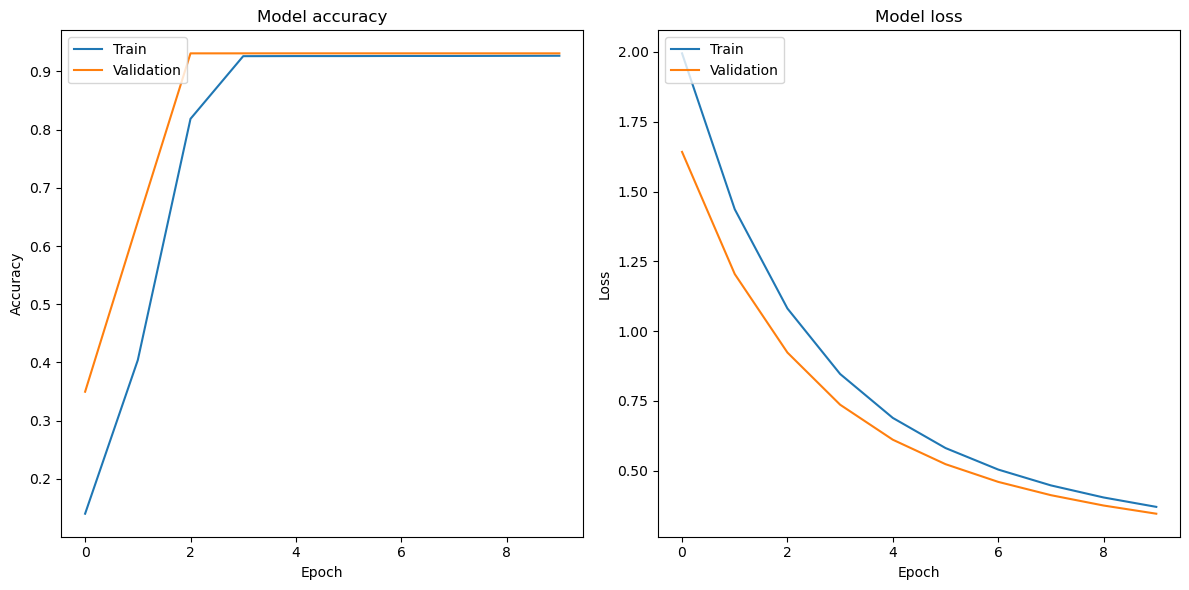

55/55 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.9334
Test Accuracy: 93.34%
55/55 [==============================] - 0s 1ms/step


In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Load and Preprocess Data.
# Split the data into features (X) and labels (y).
X = data_norm[['Ax', 'Ay', 'Az', 'Mx', 'My', 'Mz']]
y = data_norm['Label']

# Step 2: Split the data into training and testing sets (80% training and 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the model architecture
num_features = X_train.shape[1]

# This line sets the number of hidden units or neurons in the hidden layer 
# of the neural network. In this case, it is set to 4.
hidden_units = 4

# This line calculates the number of output units in the output layer of 
# the neural network.It assumes that y is the target variable, and np.unique(y) 
# returns the unique classes in the target variable.The length of this unique 
# set represents the number of output classes.
output_units = len(np.unique(y))

# This line creates a Sequential model using Keras.
# The Sequential model is a linear stack of layers, where I can simply add one layer at a time.
model = models.Sequential()

# This line adds an input layer to the model.
model.add(layers.InputLayer(input_shape=(num_features,)))

# This line starts a while loop that continues executing the code within
# its block as long as the value of hidden_units is greater than the 
# value of output_units.
while hidden_units > output_units:
    # Inside the loop, this line adds a dense (fully connected) layer to a neural network model. 
    # The Dense layer is a standard layer in neural networks where each neuron in the layer 
    # is connected to every neuron in the previous layer.
    model.add(layers.Dense(hidden_units, activation='relu'))
    
    # After adding a layer, this line decrements the value of hidden_units by 5. 
    # This means that each iteration of the loop reduces the number of neurons in the hidden layer by 5.
    hidden_units -= 5

model.add(layers.Dense(output_units, activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 7: Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Step 8: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Step 8: Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

### Confusion Matrix

The confusion matrix provides a detailed breakdown of model predictions on the test set across different classes.<br> It is visualized using the ConfusionMatrixDisplay from scikit-learn. This is a normalized confusion matrix.<br> Each row corresponds to the true class, and each column corresponds to the predicted class.<br> The values in the matrix are normalized, meaning they represent the fraction of true instances for each class that<br> were correctly or incorrectly predicted.

This allows you to see how well the model is performing for each class, including any potential misclassifications.

Here is how to interpret the confusion matrix:
- <b>Diagonal Elements (Top-left to Bottom-right):</b>
  - The values on the diagonal (e.g., 0.97807018, 1.0, 1.0, 0.99494949, 1.0) represent the accuracy for<br>each class. These are the proportions of correctly classified instances for each class.
- <b>Off-diagonal Elements:</b>
  - The non-zero values off the diagonal (e.g., 0.02192982, 0.00505051, 0.03809524, 0.00952381) indicate<br> misclassifications between different classes. For example, in the first row, third column (0.02192982)<br> indicates the proportion of instances of class 1 that were misclassified as class 3.
  
<b>Interpretation of Specific Values</b>
Example: The value 0.00505051 in the fourth row, first column suggests<br> that approximately 0.5% of instances of class 3 were misclassified as class 1.

<b>Class Imbalances</b>
If the number of instances varies significantly between classes, misclassification rates might<br> not provide a complete picture. It could be helpful to consider precision, recall, or F1-score for a more<br> detailed assessment.

<b>Overall Performance</b>
The diagonal values should be high, and off-diagonal values should be low for a<br> well-performing model.

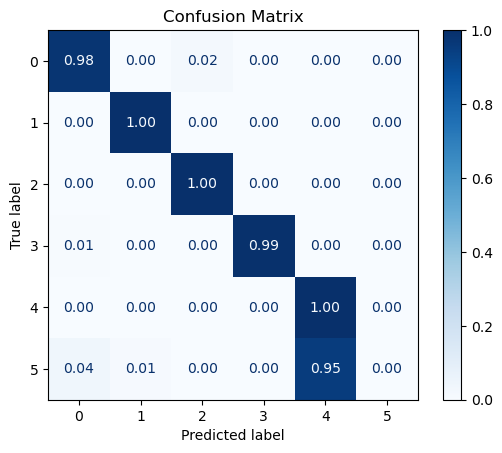

In [8]:
# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format=".2f")
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Print the position predictions
print("Position Predictions:")
print(y_pred)

Position Predictions:
[0 1 4 ... 1 2 0]
